In [1]:
pip install keras

In [2]:
pip install tensorflow

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
import numpy as np
import pandas as pd

In [7]:
diabetes_data = load_diabetes()

In [8]:
X = diabetes_data.data
y = diabetes_data.target

In [9]:
df = pd.DataFrame(data=X, columns=diabetes_data.feature_names)
df['target'] = y

In [10]:
missing_values = df.isnull().sum()

In [11]:
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

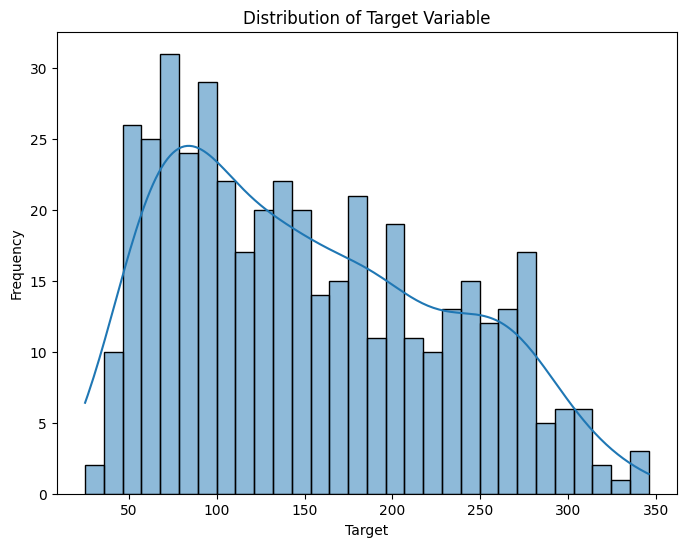

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()


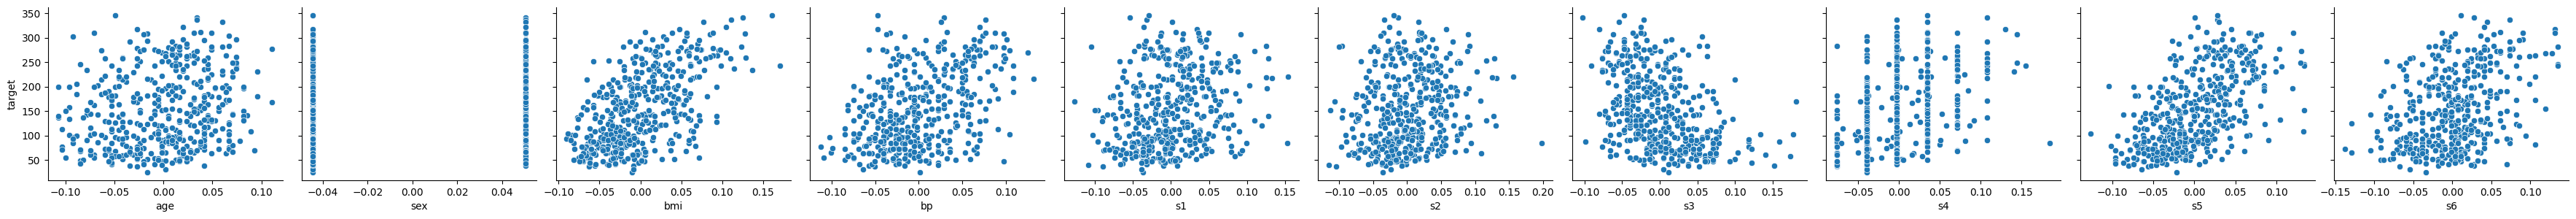

In [15]:
sns.pairplot(df, y_vars='target', x_vars=diabetes_data.feature_names, height=3, aspect=1.2)
plt.show()


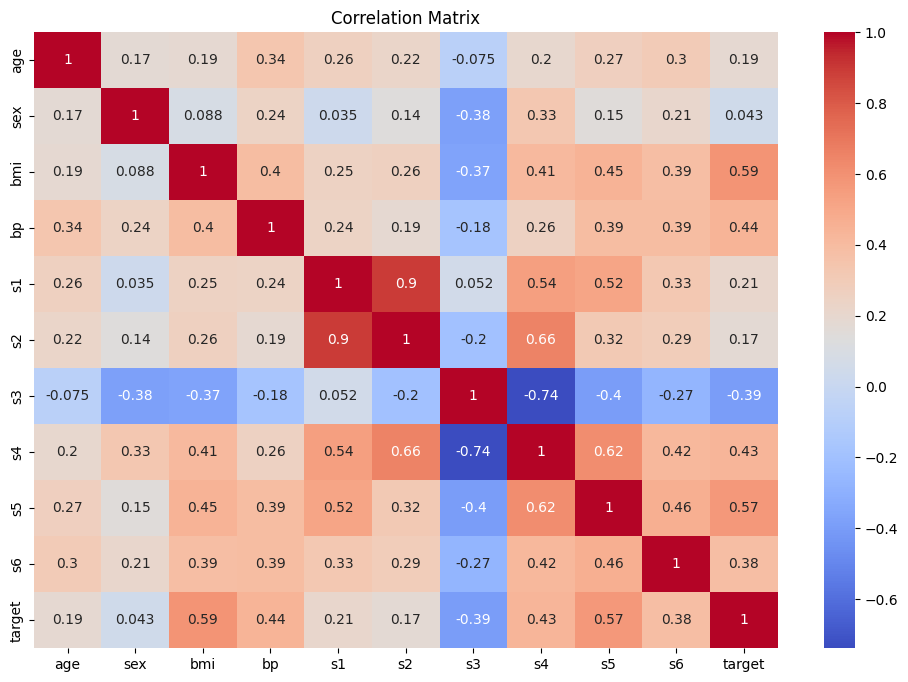

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [18]:
model = Sequential()


In [19]:
model.add(Dense(64, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.add(Dense(1))


In [21]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 28777.2031 - mean_squared_error: 28777.2031 - val_loss: 26366.2266 - val_mean_squared_error: 26366.2266
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31550.6172 - mean_squared_error: 31550.6172 - val_loss: 26137.2070 - val_mean_squared_error: 26137.2070
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29631.6875 - mean_squared_error: 29631.6875 - val_loss: 25874.2773 - val_mean_squared_error: 25874.2773
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29831.0312 - mean_squared_error: 29831.0312 - val_loss: 25542.1133 - val_mean_squared_error: 25542.1133
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28380.6211 - mean_squared_error: 28380.6211 - val_loss: 25120.7246 - val_mean_squared_error: 25120.7246
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28967.5547 - mean_squared_error: 28967.5547 - val_loss: 24573.8086 - val_mean_squared_error: 24573.8086
Epoch 7/100
12/12 ━━━

In [25]:
from sklearn.metrics import mean_squared_error, r2_score


In [26]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [27]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 3015.236219195509
R² Score: 0.4308890416285779


In [28]:
from tensorflow.keras.layers import Dropout

In [29]:
model_improved = Sequential()
model_improved.add(Dense(128, input_dim=X_scaled.shape[1], activation='relu'))
model_improved.add(Dropout(0.3))
model_improved.add(Dense(64, activation='relu'))
model_improved.add(Dropout(0.3))
model_improved.add(Dense(32, activation='relu'))
model_improved.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model_improved.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


In [31]:
history_improved = model_improved.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 27265.5215 - mean_squared_error: 27265.5215 - val_loss: 26161.7559 - val_mean_squared_error: 26161.7559
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 29447.8223 - mean_squared_error: 29447.8223 - val_loss: 25474.2363 - val_mean_squared_error: 25474.2363
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28117.8691 - mean_squared_error: 28117.8691 - val_loss: 24060.7480 - val_mean_squared_error: 24060.7480
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25171.8066 - mean_squared_error: 25171.8066 - val_loss: 21349.7109 - val_mean_squared_error: 21349.7109
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24666.0996 - mean_squared_error: 24666.0996 - val_loss: 16767.4980 - val_mean_squared_error: 16767.4980
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15307.4238 - mean_squared_error: 15307.4238 - val_loss: 10709.8486 - val_mean_squared_error: 10709.8486
Epoch 7/100
12/12 ━━━

In [32]:
y_pred_improved = model_improved.predict(X_test)
mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [33]:
print(f"Improved Mean Squared Error: {mse_improved}")
print(f"Improved R² Score: {r2_improved}")

Improved Mean Squared Error: 3022.7377674164386
Improved R² Score: 0.4294731614165719
